In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9697.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_10087.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9618.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9614.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9862.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9838.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9851.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9691.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/

In [20]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [3]:
train_path = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train'
test_path ='/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test'
malignant = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/malignant'
benign = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/benign'

In [4]:
def plot_accuracy_loss(history):
    
    
    fig = plt.figure(figsize=(10,5))
    
    # Plot the accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'], label = 'acc')
    plt.plot(history.history['val_accuracy'], label = 'val_acc')
    plt.title('train accuracy vs validation accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    
    
    # Plot loss
    plt.subplot(222)
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.title('train_loss vs val_loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    
    plt.legend()
    plt.show()

In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 3s 0us/step


In [8]:
for layer in resnet.layers:
    layer.trainable = False

In [9]:
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 9605 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [17]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
301/301 [==============================] - 1102s 4s/step - loss: 0.7227 - accuracy: 0.6569 - val_loss: 0.4549 - val_accuracy: 0.8170
Epoch 2/30
301/301 [==============================] - 1084s 4s/step - loss: 0.5084 - accuracy: 0.7457 - val_loss: 0.5109 - val_accuracy: 0.7330
Epoch 3/30
301/301 [==============================] - 1043s 3s/step - loss: 0.4762 - accuracy: 0.7703 - val_loss: 0.4775 - val_accuracy: 0.7810
Epoch 4/30
301/301 [==============================] - 1092s 4s/step - loss: 0.4410 - accuracy: 0.7996 - val_loss: 0.3483 - val_accuracy: 0.8570
Epoch 5/30
301/301 [==============================] - 1034s 3s/step - loss: 0.4552 - accuracy: 0.7870 - val_loss: 0.3374 - val_accuracy: 0.8640
Epoch 6/30
301/301 [==============================] - 1091s 4s/step - loss: 0.4449 - accuracy: 0.7982 - val_loss: 0.3625 - val_accuracy: 0.8400
Epoch 7/30
301/301 [==============================] - 1042s 3s/step - loss: 0.3976 - accuracy: 0.8200 - val_loss: 0.4620 - val_accuracy:

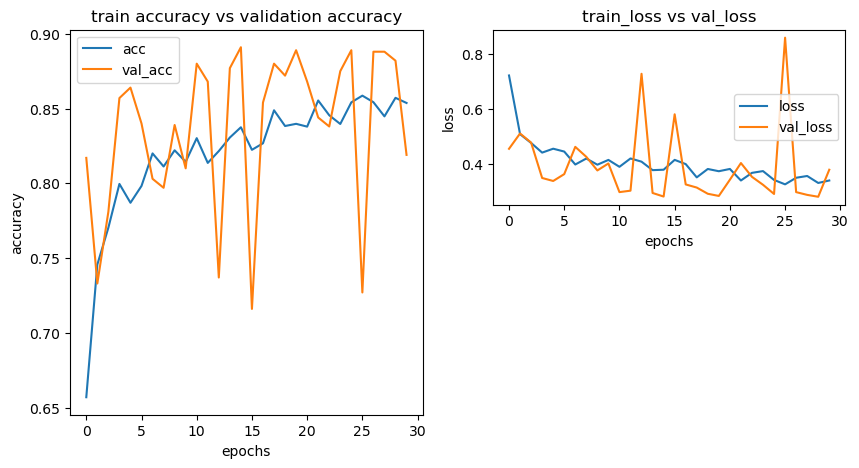

In [21]:
plot_accuracy_loss(r)